# Data Preparation and EDA for IoT23 dataset

In [1]:
import os 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
from numpy import array
from numpy import argmax
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
data= pd.read_csv('D:\JupyterNotebook\GitHub\IoT-BotNet-detection-on-IoT23-dataset\IoT23\Data files\iot23_combined_1M.csv')

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()  

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,3e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
1,1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
2,2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
3,3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
4,4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS


In [4]:
del data['Unnamed: 0']

# Cleaning Process start! 

# dropping unncessary attributes ! 

In [5]:
df= data.drop(columns=['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p','local_orig','local_resp'])

We drop the target variables with very few data samples 

In [6]:
df.head()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,tcp,-,3e-06,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,POHS
1,tcp,-,2e-06,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,POHS
2,tcp,-,2e-06,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,POHS
3,tcp,-,2e-06,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,POHS
4,tcp,-,2e-06,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,POHS


In [7]:
df.drop(df[df['label'] == 'C&C-HeartBeat' ].index, inplace = True)

In [8]:
df.drop(df[df['label'] == 'C&C-Torii' ].index, inplace = True)

In [9]:
df.drop(df[df['label'] == 'Attack' ].index, inplace = True)

In [10]:
df.drop(df[df['label'] == 'C&C-FileDownload' ].index, inplace = True)

In [11]:
df.drop(df[df['label'] == 'C&C-Mirai' ].index, inplace = True)

In [12]:
df.drop(df[df['label'] == 'C&C-HeartBeat-FileDownload' ].index, inplace = True)

In [13]:
df.drop(df[df['label'] == 'FileDownload' ].index, inplace = True)

In [16]:
df['orig_bytes'] = df['orig_bytes'].replace('-',0)
df['resp_bytes'] = df['resp_bytes'].replace('-',0)
df['duration'] = df['duration'].replace('-',0)

In [23]:
df['service'] = df['service'].replace('-',0)

checking for any null values in the dataset

In [24]:
df.isnull().sum()

proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64

dropping out all the null values to keep the clean data only

In [25]:
df=df.dropna()

In [26]:
df.isnull().sum()

proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64

ok so now we have only clean data with few targets! 

In [27]:
df.shape

(883800, 13)

In [28]:
df.head()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
98304,tcp,0,2e006,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
98305,tcp,0,2e006,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
98306,tcp,0,6e006,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
98307,tcp,0,2e006,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
98308,tcp,0,2e006,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru


Separating dependent and independent variables

In [29]:
X= df.iloc[:,:-1]

In [30]:
y=df['label']

In [31]:
y.value_counts()

POHS      366901
Okiru     238184
Benign    149526
DDoS      114138
C&C        15051
Name: label, dtype: int64

In [32]:
X.shape

(883800, 12)

In [33]:
y.unique()

array(['Okiru', 'POHS', 'DDoS', 'Benign', 'C&C'], dtype=object)

so we only remain with 6 classes 

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883800 entries, 98304 to 1244675
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   proto          883800 non-null  object 
 1   service        883800 non-null  object 
 2   duration       883800 non-null  object 
 3   orig_bytes     883800 non-null  object 
 4   resp_bytes     883800 non-null  object 
 5   conn_state     883800 non-null  object 
 6   missed_bytes   883800 non-null  float64
 7   history        883800 non-null  object 
 8   orig_pkts      883800 non-null  float64
 9   orig_ip_bytes  883800 non-null  float64
 10  resp_pkts      883800 non-null  float64
 11  resp_ip_bytes  883800 non-null  float64
dtypes: float64(5), object(7)
memory usage: 87.7+ MB


so there are some variables which are  not strings or categorical values. Since all of those are numbers we need to convert those variables into numerical variable

In [35]:
X['orig_bytes']=X['orig_bytes'].astype(float)

In [36]:
X['duration']=X['duration'].astype(float)

In [37]:
X['resp_bytes']=X['resp_bytes'].astype(float)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883800 entries, 98304 to 1244675
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   proto          883800 non-null  object 
 1   service        883800 non-null  object 
 2   duration       883800 non-null  float64
 3   orig_bytes     883800 non-null  float64
 4   resp_bytes     883800 non-null  float64
 5   conn_state     883800 non-null  object 
 6   missed_bytes   883800 non-null  float64
 7   history        883800 non-null  object 
 8   orig_pkts      883800 non-null  float64
 9   orig_ip_bytes  883800 non-null  float64
 10  resp_pkts      883800 non-null  float64
 11  resp_ip_bytes  883800 non-null  float64
dtypes: float64(8), object(4)
memory usage: 87.7+ MB


In [39]:
#to check the count of each target variable
Yn=y.value_counts()

In [40]:
Yarray=np.array(Yn)

In [41]:
Yarray

array([366901, 238184, 149526, 114138,  15051], dtype=int64)

still C&C attack has very few samples in the data. I think it would be better drop that variable as well. 

but let us first go with it and then we decide! 

let us plot the distribution of each target variable

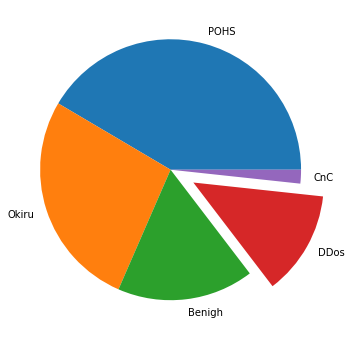

In [42]:
yn =Yarray
mylabels = ["POHS", "Okiru", "Benigh", "DDos","CnC"]
myexplode = [0,0,0,0.2,0]
plt.figure(figsize=(6,6))
plt.pie(yn, labels = mylabels, explode=myexplode)
plt.show() 

In [43]:
import seaborn as sns

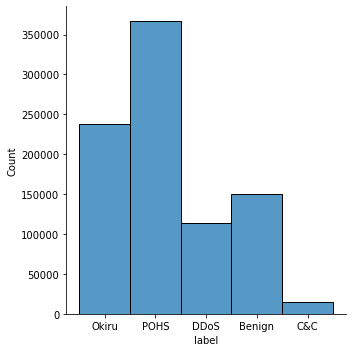

In [44]:
data = df['label']
sns.displot(data)

In [45]:
cat_df =X.select_dtypes(include=['object']).copy()

In [46]:
cat_df.head()

,proto,service,conn_state,history
98304,tcp,0,S0,S
98305,tcp,0,S0,S
98306,tcp,0,S0,S
98307,tcp,0,S0,S
98308,tcp,0,S0,S


In [47]:
cat_df = pd.get_dummies(cat_df, columns=['proto','conn_state','history','service'])

In [48]:
cat_df.head()

,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_S0,conn_state_S1,...,history_Sr,history_^c,history_^d,history_^dDA,service_0,service_dhcp,service_dns,service_http,service_irc,service_ssl
98304,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
98305,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
98306,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
98307,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
98308,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [49]:
num_df =X.select_dtypes(exclude=['object']).copy()

In [50]:
encoded_data =pd.concat([num_df,cat_df], axis=1)

In [51]:
encoded_data.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_icmp,proto_tcp,...,history_Sr,history_^c,history_^d,history_^dDA,service_0,service_dhcp,service_dns,service_http,service_irc,service_ssl
98304,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
98305,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
98306,6000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
98307,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
98308,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [52]:
encoded_data.shape

(883800, 95)

In [53]:
Xe=encoded_data

In [54]:
Xe.shape

(883800, 95)

In [55]:
Xe

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_icmp,proto_tcp,...,history_Sr,history_^c,history_^d,history_^dDA,service_0,service_dhcp,service_dns,service_http,service_irc,service_ssl
98304,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
98305,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
98306,6000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
98307,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
98308,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244671,0.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
1244672,0.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
1244673,0.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
1244674,0.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [56]:
Xe.shape

(883800, 95)

In [57]:
print(y.shape)

(883800,)


In [58]:
np.unique(y)

array(['Benign', 'C&C', 'DDoS', 'Okiru', 'POHS'], dtype=object)

In [59]:
encoder=LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [60]:
ye=encoder.transform(y)
np.unique(y)

array(['Benign', 'C&C', 'DDoS', 'Okiru', 'POHS'], dtype=object)

In [61]:
le=LabelEncoder()
Ye=le.fit_transform(y)
print(Ye)

[3 3 3 ... 4 4 4]


 Standarad scaling 

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaling=StandardScaler()

In [64]:
X_sc=scaling.fit_transform(Xe)

In [65]:
X_sc

array([[ 3.36767016e+00, -2.03078333e-03, -1.39228774e-03, ...,
        -8.03108892e-03, -4.32090623e-02, -3.00863817e-03],
       [ 3.36767016e+00, -2.03078333e-03, -1.39228774e-03, ...,
        -8.03108892e-03, -4.32090623e-02, -3.00863817e-03],
       [ 1.04090253e+01, -2.03078333e-03, -1.39228774e-03, ...,
        -8.03108892e-03, -4.32090623e-02, -3.00863817e-03],
       ...,
       [-1.53007406e-01, -2.03078333e-03, -1.39228774e-03, ...,
        -8.03108892e-03, -4.32090623e-02, -3.00863817e-03],
       [-1.53007406e-01, -2.03078333e-03, -1.39228774e-03, ...,
        -8.03108892e-03, -4.32090623e-02, -3.00863817e-03],
       [-1.53007406e-01, -2.03078333e-03, -1.39228774e-03, ...,
        -8.03108892e-03, -4.32090623e-02, -3.00863817e-03]])

In [66]:
X_sc.shape

(883800, 95)

In [67]:
Ye.shape

(883800,)

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
import time as timer

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sc, Ye, random_state=124, test_size=0.30)

# Gussian Naive Bayes 

In [74]:
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 1.28 seconds


In [75]:
# Predicting the test set results
y_gnb = gnb_model.predict(X_test)
y_gnb_prob = gnb_model.predict_proba(X_test)

In [76]:
print("Classification report for GNB: \n{}".format(classification_report(Y_test,y_gnb)))
print("Confusion matrix for GNB: \n{}".format(confusion_matrix(Y_test,y_gnb)))
print("Accuracy score for GNB: {:.2f}".format(accuracy_score(Y_test,y_gnb)))
# calculate precision, recall, and f1 scores
prec_gnb = precision_score(Y_test,y_gnb,average='weighted')
rec_gnb = recall_score(Y_test,y_gnb,average='weighted')
f1_gnb = f1_score(Y_test,y_gnb,average='weighted')
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for GNB: 
              precision    recall  f1-score   support

           0       0.99      0.10      0.19     44992
           1       0.63      0.12      0.20      4443
           2       1.00      1.00      1.00     34017
           3       0.00      0.00      0.00     71736
           4       0.49      1.00      0.66    109952

    accuracy                           0.56    265140
   macro avg       0.62      0.44      0.41    265140
weighted avg       0.51      0.56      0.43    265140

Confusion matrix for GNB: 
[[  4632    307      2      0  40051]
 [     2    515      0      0   3926]
 [     2      0  33887      0    128]
 [    46      0      0      0  71690]
 [     0      0      2      0 109950]]
Accuracy score for GNB: 0.56
Precision score for GNB: 0.51
Recall score for GNB: 0.56
F1 score for GNB: 0.43


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression 

In [205]:
LogisticRegression?

In [65]:
start = timer.time()
logit_model = LogisticRegression(solver='sag', max_iter=300, multi_class='multinomial')
logit_model.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 581.68 seconds


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [66]:
# Predicting the test set results
y_logit = logit_model.predict(X_test)
y_logit_prob = logit_model.predict_proba(X_test)

In [67]:
print("Classification report for LR: \n{}".format(classification_report(Y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(Y_test,y_logit)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(Y_test,y_logit)))
# calculate precision, recall, and f1 scores
prec_logit = precision_score(Y_test,y_logit,average='weighted')
rec_logit = recall_score(Y_test,y_logit,average='weighted')
f1_logit = f1_score(Y_test,y_logit,average='weighted')
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))


Classification report for LR: 
              precision    recall  f1-score   support

           0       0.99      0.10      0.19     29968
           1       0.64      0.11      0.18      2956
           2       1.00      1.00      1.00     22709
           3       0.71      0.00      0.00     47964
           4       0.49      1.00      0.65     73163

    accuracy                           0.56    176760
   macro avg       0.77      0.44      0.40    176760
weighted avg       0.70      0.56      0.43    176760

Confusion matrix for LR: 
[[ 3066   181     4    12 26705]
 [   14   318     1     0  2623]
 [    1     0 22613     0    95]
 [    1     0     0    30 47933]
 [    0     0     0     0 73163]]
Accuracy score for LR: 0.56
Precision score for LR: 0.70
Recall score for LR: 0.56
F1 score for LR: 0.43


In [225]:
cf=confusion_matrix(Y_test,y_logit)

In [226]:
 from sklearn.metrics import plot_confusion_matrix

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


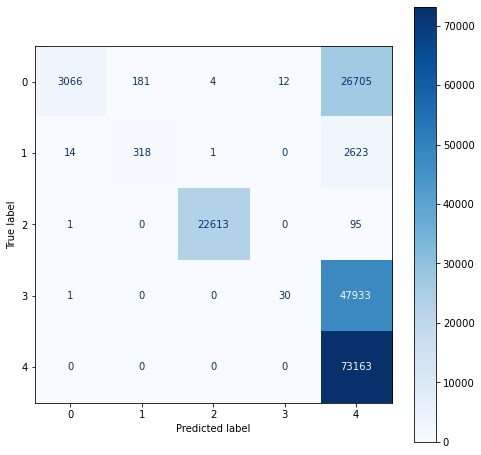

In [227]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(logit_model, X_test, Y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

# RandomForestClassifier


In [77]:
start = timer.time()
Rf_clf=RandomForestClassifier(n_estimators =500, criterion = 'entropy', random_state = 124)
Rf_clf.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.4f} seconds".format(end-start))

Finished training within 495.3660 seconds


In [69]:
y_RF = Rf_clf.predict(X_test)
y_RF_prob = Rf_clf.predict_proba(X_test)

In [70]:
print("Classification report for RF: \n{}".format(classification_report(Y_test,y_RF)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(Y_test,y_RF)))
print("Accuracy score for RF: {:.4f}".format(accuracy_score(Y_test,y_RF)))
# calculate precision, recall, and f1 scores
prec_rf = precision_score(Y_test,y_RF, average='weighted')
rec_rf = recall_score(Y_test,y_RF,average='weighted')
f1_rf = f1_score(Y_test,y_RF,average='weighted')

Classification report for RF: 
              precision    recall  f1-score   support

           0       0.90      0.78      0.84     29968
           1       1.00      0.11      0.20      2956
           2       1.00      1.00      1.00     22709
           3       0.73      0.00      0.00     47964
           4       0.57      1.00      0.73     73163

    accuracy                           0.68    176760
   macro avg       0.84      0.58      0.55    176760
weighted avg       0.73      0.68      0.57    176760

Confusion matrix for RF: 
[[23389     0     0    10  6569]
 [ 2625   331     0     0     0]
 [    1     0 22614     0    94]
 [    3     0     0    30 47931]
 [    4     0     0     1 73158]]
Accuracy score for RF: 0.6762


In [71]:
cf=confusion_matrix(Y_test,y_RF)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


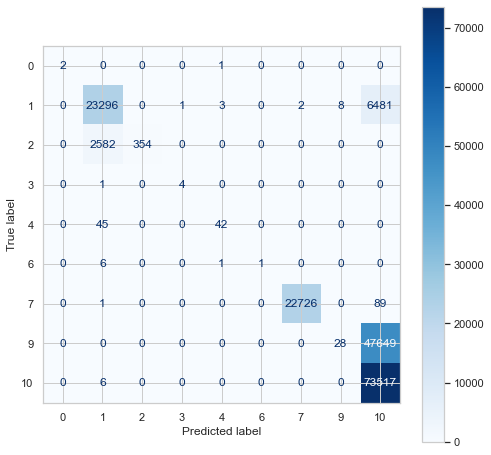

In [222]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(Rf_clf, X_test, Y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

In [140]:
start = timer.time()
DT_clf= DecisionTreeClassifier()
DT_clf.fit(X_train,Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 0.62 seconds


In [141]:
y_DT = DT_clf.predict(X_test)
y_DT_prob = DT_clf.predict_proba(X_test)

In [142]:
print("Classification report for DT: \n{}".format(classification_report(Y_test,y_DT)))
print("Confusion matrix for DT: \n{}".format(confusion_matrix(Y_test,y_DT)))
print("Accuracy score for DT: {:.2f}".format(accuracy_score(Y_test,y_DT)))

# calculate precision, recall, and f1 scores
prec_dt = precision_score(Y_test,y_DT, average='micro')
rec_dt = recall_score(Y_test,y_DT, average='micro')
f1_dt = f1_score(Y_test,y_DT, average='micro')
print("Precision score for DT: {:.2f}".format(prec_dt))
print("Recall score for DT: {:.2f}".format(rec_dt))
print("F1 score for RF: {:.2f}".format(f1_dt))


Classification report for DT: 
              precision    recall  f1-score   support

           0       0.90      0.78      0.84     29968
           1       1.00      0.11      0.20      2956
           2       1.00      1.00      1.00     22709
           3       0.75      0.00      0.00     47964
           4       0.57      1.00      0.73     73163

    accuracy                           0.68    176760
   macro avg       0.84      0.58      0.55    176760
weighted avg       0.74      0.68      0.57    176760

Confusion matrix for DT: 
[[23390     0     1     9  6568]
 [ 2624   332     0     0     0]
 [    2     0 22615     0    92]
 [    3     0     0    30 47931]
 [    4     0     1     1 73157]]
Accuracy score for DT: 0.68
Precision score for DT: 0.68
Recall score for DT: 0.68
F1 score for RF: 0.68


# Cross Validation 

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

In [73]:
gnb_model = GaussianNB()

In [74]:
start = timer.time()
score = ['precision_macro', 'recall_macro','accuracy','f1_macro']
scores = cross_validate(gnb_model, X_sc, Ye, scoring=score, cv=10, n_jobs=-1)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 32.56 seconds


In [75]:
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_macro',
 'test_precision_macro',
 'test_recall_macro']

In [76]:
print(np.mean(scores['test_accuracy']))

0.5629361846571623


In [77]:
print(np.mean(scores['test_recall_macro']))

0.44141328447432804


In [78]:
print(np.mean(scores['test_precision_macro']))

0.5400346219529496


In [79]:
DT_clf= DecisionTreeClassifier()

In [80]:
start = timer.time()
score = ['precision_macro', 'recall_macro','accuracy','f1_macro']
scores = cross_validate(DT_clf, X_sc, Ye, scoring=score, cv=10, n_jobs=-1)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 33.77 seconds


# OVERSAMPLING DATA using SMOTE

In [78]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [81]:
X_sc

array([[ 3.36767016e+00, -2.03078333e-03, -1.39228774e-03, ...,
        -8.03108892e-03, -4.32090623e-02, -3.00863817e-03],
       [ 3.36767016e+00, -2.03078333e-03, -1.39228774e-03, ...,
        -8.03108892e-03, -4.32090623e-02, -3.00863817e-03],
       [ 1.04090253e+01, -2.03078333e-03, -1.39228774e-03, ...,
        -8.03108892e-03, -4.32090623e-02, -3.00863817e-03],
       ...,
       [-1.53007406e-01, -2.03078333e-03, -1.39228774e-03, ...,
        -8.03108892e-03, -4.32090623e-02, -3.00863817e-03],
       [-1.53007406e-01, -2.03078333e-03, -1.39228774e-03, ...,
        -8.03108892e-03, -4.32090623e-02, -3.00863817e-03],
       [-1.53007406e-01, -2.03078333e-03, -1.39228774e-03, ...,
        -8.03108892e-03, -4.32090623e-02, -3.00863817e-03]])

In [82]:
Ye

array([3, 3, 3, ..., 4, 4, 4])

In [83]:
counter = Counter(Ye)
for k,v in counter.items():
	per = v / len(Ye) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=3, n=238184 (26.950%)
Class=4, n=366901 (41.514%)
Class=2, n=114138 (12.914%)
Class=0, n=149526 (16.919%)
Class=1, n=15051 (1.703%)


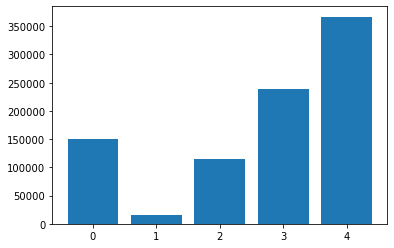

In [85]:
plt.bar(counter.keys(), counter.values())
plt.show()

In [86]:
oversample = SMOTE()

In [87]:
Xs, ys = oversample.fit_resample(X_sc, Ye)

In [89]:
counter = Counter(ys)
for k,v in counter.items():
	per = v / len(ys) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=3, n=366901 (20.000%)
Class=4, n=366901 (20.000%)
Class=2, n=366901 (20.000%)
Class=0, n=366901 (20.000%)
Class=1, n=366901 (20.000%)


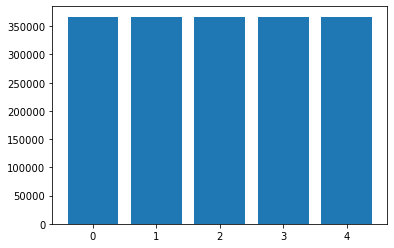

In [92]:
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [101]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(Xs, ys, random_state=124, test_size=0.20)

In [104]:
X_train.shape

(1467604, 95)

In [105]:
X_test.shape

(366901, 95)

In [106]:
gnb_model = GaussianNB()

In [107]:
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 2.88 seconds


In [108]:
# Predicting the test set results
y_gnb = gnb_model.predict(X_test)
y_gnb_prob = gnb_model.predict_proba(X_test)

In [109]:
print("Classification report for GNB: \n{}".format(classification_report(Y_test,y_gnb)))
print("Confusion matrix for GNB: \n{}".format(confusion_matrix(Y_test,y_gnb)))
print("Accuracy score for GNB: {:.2f}".format(accuracy_score(Y_test,y_gnb)))
# calculate precision, recall, and f1 scores
prec_gnb = precision_score(Y_test,y_gnb,average='weighted')
rec_gnb = recall_score(Y_test,y_gnb,average='weighted')
f1_gnb = f1_score(Y_test,y_gnb,average='weighted')
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for GNB: 
              precision    recall  f1-score   support

           0       0.99      0.10      0.19     73393
           1       0.94      0.11      0.20     72941
           2       1.00      1.00      1.00     73421
           3       0.00      0.00      0.00     73658
           4       0.26      1.00      0.42     73488

    accuracy                           0.44    366901
   macro avg       0.64      0.44      0.36    366901
weighted avg       0.64      0.44      0.36    366901

Confusion matrix for GNB: 
[[ 7515   519     5     0 65354]
 [    0  7967     0     0 64974]
 [    4     0 73153     0   264]
 [   45     1     0     0 73612]
 [    0     0     3     0 73485]]
Accuracy score for GNB: 0.44


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score for GNB: 0.64
Recall score for GNB: 0.44
F1 score for GNB: 0.36


In [ ]:
start = timer.time()
Rf_clf=RandomForestClassifier(n_estimators = 300, criterion = 'gini', random_state =124)
Rf_clf.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

In [ ]:
start = timer.time()
y_RF = Rf_clf.predict(X_test)
y_RF_prob = Rf_clf.predict_proba(X_test)
end = timer.time()
print("Finished testing within {:.2f} seconds".format(end-start))

In [ ]:
print("Classification report for RF: \n{}".format(classification_report(Y_test,y_RF)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(Y_test,y_RF)))
print("Accuracy score for RF: {:.4f}".format(accuracy_score(Y_test,y_RF)))
# calculate precision, recall, and f1 scores
prec_RF = precision_score(Y_test,y_RF,average='weighted')
rec_RF = recall_score(Y_test,y_RF,average='weighted')
f1_RF = f1_score(Y_test,y_RF,average='weighted')
print("Precision score for RF: {:.4}".format(prec_gnb))
print("Recall score for RF: {:.4}".format(rec_gnb))
print("F1 score for RF: {:.4}".format(f1_gnb))